This code has been prouced as a teaching resource for the UKSA space software, data and AI course run by the Space South Central Universities.

Contributors to this code includes: B. Canning; M. Schaefer; S. Youles

### Learning Outcome
<div class="alert alert-block alert-info"> 
<b>NOTE</b> In this notebook we will aim to understand how to use the geopandas package to manipulate spatial data in python.
</div>

### Imports and intro

In [2]:
!pip --quiet install geopandas

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

Python is a particularly useful language to code in because 1) it is free and 2) many people have written efficient code packages for python that you can simply install using package managers such as 'pip' and 'conda'.

In the code above, we imported four packages, 'matplotlib', 'numpy', 'pandas' and 'geopandas'.

Matplotlib is a powerful plotting package with many inbuilt options.

Numpy is a package which enable us to do efficient maths calculations. In particular it is efficient for operations which are done on arrays or data - for example if you want to do the same calculation on multiple datapoints at once. This will be important to use as we are going to be training our algorithms with lots of data.

Pandas is a package which you can think of like a much more advanced and customisable Microsoft Excel or Google Sheets spreadsheet. A 'sheet' in this context is called a 'dataframe'. It can hold all sorts of data: string data, floats, integers, missing data points. With this package you can filter your dataframe, merge two different dataframes toegther and perform other useful operations.

Geopandas is simply an extension to the popular pandas package which also allows us to store in our 'dataframes' or 'spreadsheet', 'geometry' columns and to perform spatial operations. Spatial operations basically meaning you can filter your data based on 'spatial' information.

Common vector data formats that you might have come across from QGIS or AcrGIS software are 'GeoPackage', 'GeoJSON', and 'Shapefiles'.

To apply AI/ML techniques to downstream space data we will need to understand how to manipulate spatial data.  

We'll practice this now.





For use in geopandas there are some readily available datasets which can be very useful for practicing with the code. These live in the 'geodatasets' package (https://github.com/geopandas/geodatasets). A full install of the geopandas software with all its dependencies will also install this but incase you do not have it you can install it with

        > pip install geodatasets
        
Let's open one of these datsets and play.

First we'll need to see what datasets are available to us:

In [6]:
! pip --quiet install geodatasets # the '!' here essentially means 'escape to terminal' it enables us to run our terminal 'pip' command in the notebook
import geodatasets

print(geodatasets.data.flatten().keys())

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

### **Tasks covered in this notebook**

Now the tasks we are going to do will be to:

1. *Print out and explore the data within a dataframe*
2. *Plot a dataframe*
3. *Filter a dataframe based on a 'box' region that we specify*
4. *Coordinate reference systems and transformations*
5. *Join our dataframe with another and filter that one too*
6. *Plot the dataframes on top of each other*

As we want to demonstrate these takes we are going to pick a 'test' dataset to do this with that already has a few different overlapping views - this is just to make our lives easier for this particular demonstration.

I see above that there are several datasets related to 'nyc' - so let's use some of these.

First let us read in the New York City Neighborhoods and Education districts datasets ('nyc_neighborhoods' and 'nyc_education').

Let's start with the nyc_neighborhoods dataset and go through this slowly.

Now looking in the dictionary names above the full name for the nyc_neighborhoods dataset is

        geoda.nyc_neighborhoods

So let's create a variable for this

In [7]:
# I am a python comment!
dataset_name = "geoda.nyc_neighborhoods"  # my dataset name variable

Now we need to know where to find this inbuilt geodatasets dataset and we do this with the handy geodatasets function called 'get_path'.

In python speak you would use:

        > geodatasets.get_path("inbuilt_dataset_name_here")

Let's save this into a variable and then print it and see what is given as the path name

In [8]:
path_name = geodatasets.get_path(dataset_name)
print(path_name)

/home/jovyan/.cache/geodatasets/nycnhood_acs.zip


So that is where our dataset lives.

In geopandas we can read it in with the function read_file.

Now remember we imported geopandas as 'gpd' so we'll be calling this function with:

        > gpd.read_file("path_name_to_dataset_goes_here")

Let's save this into a variable too. This variable is now a geopandas dataframe (sometimes called a 'geodataframe' or 'gdf'). It's kinda like a spreadsheet with a bunch of data in and we'll demonstrate that by printing a couple lines of it here.


In [9]:
nyc_nei = gpd.read_file(path_name)

nyc_nei[0:2]

,UEMPRATE,cartodb_id,borocode,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,...,boroname,popdty,ntacode,medianinco,medianagem,medianagef,medianage,HHsize,gini,geometry
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,Brooklyn,497498.701,BK45,1520979,663.3,777.1,722.6,2.96421052631579,0.386315789473684,"POLYGON ((-73.91716 40.63173, -73.91722 40.631..."
1,0.090011,2,3,2089,7132,1016,10981,1075,2652,61584,...,Brooklyn,589296.926,BK17,1054259,791.4,868.5,827.6,2.46578947368421,0.448089473684211,"POLYGON ((-73.91809 40.58657, -73.91813 40.586..."


Now we could have done the above in one step. Let's do it in one step for the nyc_edu data.

In [10]:
nyc_edu = gpd.read_file(geodatasets.get_path("geoda.nyc_education"))

So we have some spatial data. Let's get on with learning the tasks above. As a reminder they were:

1. Print out and explore the data within a dataframe
2. Plot a dataframe
3. Filter a dataframe based on a 'box' region that we specify
4. Coordinate reference systems and transformations
5. Join our dataframe with another and filter that one too
6. Plot the dataframes on top of each other

### 1. Print out and explore the data within a dataframe

We printed a couple of lines of our dataframe above - let's now explore this entire dataframe a bit further we can print out the dataframe in our notebook rather simply by just calling it in a code cell like the below.



In [11]:
nyc_nei

,UEMPRATE,cartodb_id,borocode,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,...,boroname,popdty,ntacode,medianinco,medianagem,medianagef,medianage,HHsize,gini,geometry
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,Brooklyn,497498.701,BK45,1520979,663.3,777.1,722.6,2.96421052631579,0.386315789473684,"POLYGON ((-73.91716 40.63173, -73.91722 40.631..."
1,0.090011,2,3,2089,7132,1016,10981,1075,2652,61584,...,Brooklyn,589296.926,BK17,1054259,791.4,868.5,827.6,2.46578947368421,0.448089473684211,"POLYGON ((-73.91809 40.58657, -73.91813 40.586..."
2,0.130393,3,3,3231,8847,2891,21235,712,6483,100130,...,Brooklyn,1506628.84,BK61,980637,863.1,983.9,923.8,2.42925925925926,0.473666666666667,"POLYGON ((-73.92165 40.67887, -73.92171 40.678..."
3,0.086633,4,3,1103,3508,553,7188,475,1709,33155,...,Brooklyn,468975.876,BK90,519058,333.6,350.1,341.3,2.189,0.44139,"POLYGON ((-73.92406 40.71411, -73.92404 40.714..."
4,0.099184,5,4,326,2229,132,5307,187,1276,24199,...,Queens,125384.135,QN23,354073,219,246.3,232.4,2.95666666666667,0.413133333333333,"MULTIPOLYGON (((-73.86788 40.78736, -73.86803 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.060002,191,1,623,3200,209,4215,2563,1543,40059,...,Manhattan,477391.96,MN24,1129924,343.5,363.9,349.9,1.981,0.55486,"POLYGON ((-73.9926 40.72414, -73.99263 40.7240..."
191,0.058058,192,4,646,1786,635,17462,266,1638,50295,...,Queens,703387.79,QN26,425052,271.3,270.6,272.9,4.39111111111111,0.402066666666667,"POLYGON ((-73.8545 40.75828, -73.85421 40.7578..."
192,0.089140,193,4,270,2639,140,4945,167,1310,27677,...,Queens,340431.235,QN30,807240,562,548.4,556.1,2.62,0.380878571428571,"POLYGON ((-73.88852 40.73453, -73.88848 40.734..."
193,0.054630,194,4,144,1944,272,6546,137,738,25088,...,Queens,211994.513,QN50,306071,223.4,227.3,224.4,2.94666666666667,0.421883333333333,"POLYGON ((-73.89175 40.74681, -73.89139 40.746..."


You can scroll down and across and see that it is like a spreadsheet.

At the bottom left hand corner it says this is 195 rows x 99 columns. But we can also get that information using the 'shape' function.

In [12]:
nyc_nei.shape

(195, 99)

We can also list the column names in a more readable format rather than scrolling through the above.  We do this with the function 'columns'.

In [13]:
nyc_nei.columns

Index(['UEMPRATE', 'cartodb_id', 'borocode', 'withssi', 'withsocial',
       'withpubass', 'struggling', 'profession', 'popunemplo', 'poptot',
       'popover18', 'popinlabou', 'poororstru', 'poor', 'pacificune',
       'pacificinl', 'pacific', 'otherunemp', 'otherinlab', 'otherethni',
       'onlyprofes', 'onlymaster', 'onlylessth', 'onlyhighsc', 'onlydoctor',
       'onlycolleg', 'onlybachel', 'okay', 'mixedunemp', 'mixedinlab', 'mixed',
       'master', 'maleunempl', 'maleover18', 'male_pro', 'male_mastr',
       'male_lesHS', 'male_HS', 'male_doctr', 'male_collg', 'male_BA',
       'maleinlabo', 'maledrop', 'male16to19', 'male', 'lessthan10',
       'lessthanhi', 'households', 'hispanicun', 'hispanicin', 'hispanic',
       'highschool', 'field_1', 'femaleunem', 'femaleover', 'fem_profes',
       'fem_master', 'fem_lessHS', 'fem_HS', 'fem_doctor', 'fem_colleg',
       'fem_BA', 'femaleinla', 'femaledrop', 'femal16_19', 'female',
       'europeanun', 'europeanin', 'european', 'doctor

Here we can see that there is all sorts of information about the neighborhoods such as 'population total' in 'poptot' etc. We can also see that the final column here is called 'geometry'. Let's look at that in more detail.

In [14]:
nyc_nei['geometry']

0      POLYGON ((-73.91716 40.63173, -73.91722 40.631...
1      POLYGON ((-73.91809 40.58657, -73.91813 40.586...
2      POLYGON ((-73.92165 40.67887, -73.92171 40.678...
3      POLYGON ((-73.92406 40.71411, -73.92404 40.714...
4      MULTIPOLYGON (((-73.86788 40.78736, -73.86803 ...
                             ...                        
190    POLYGON ((-73.9926 40.72414, -73.99263 40.7240...
191    POLYGON ((-73.8545 40.75828, -73.85421 40.7578...
192    POLYGON ((-73.88852 40.73453, -73.88848 40.734...
193    POLYGON ((-73.89175 40.74681, -73.89139 40.746...
194    POLYGON ((-73.90203 40.76742, -73.90218 40.767...
Name: geometry, Length: 195, dtype: geometry

So the 'geometry' column in our dataframe contains the coordinates of a polygon, or of multipolygons. These are what enable us to draw 'shapes' of locations on a map.

We access the rows related to these columns using the python array indexing with square brackets.  Specific to pandas and geopandas if we want to display a row of a dataframe we use the 'loc' function.

E.g. nyc_nei row 1 will be called by

    > nyc_nei.loc[0]

We can do the same with columns. The shapes provided in the geometry column will be drawn out directly unless we use the print() statement.

Let's see a couple of examples below.

In [15]:
nyc_nei.loc[1] # this is row 2 of the nyc_nei dataframe

UEMPRATE                                               0.090011
cartodb_id                                                    2
borocode                                                      3
withssi                                                    2089
withsocial                                                 7132
                                    ...                        
medianagef                                                868.5
medianage                                                 827.6
HHsize                                         2.46578947368421
gini                                          0.448089473684211
geometry      POLYGON ((-73.91809256480836 40.58657033500471...
Name: 1, Length: 99, dtype: object

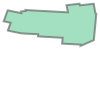

In [16]:
nyc_nei['geometry'][2] # this is the polygon from row 3 displayed visually

In [17]:
print(nyc_nei['geometry'][2]) # this is the values of the same polygon printed out

POLYGON ((-73.92164748131954 40.67887054703262, -73.92171159945374 40.67811571394567, -73.9218153903159 40.677018390461804, -73.92182361015792 40.676938358472924, -73.92183232561861 40.67684904276423, -73.92190090521791 40.67613162104446, -73.92197495287213 40.67534854777232, -73.92204843320636 40.67457439719804, -73.92213153379177 40.673683889509626, -73.92221444321088 40.67279163304963, -73.92229950367113 40.6719002621008, -73.92238401788553 40.67100876297071, -73.92245355442307 40.670261148853825, -73.92246696763324 40.67011693025531, -73.92254432235495 40.66927581119724, -73.92261354322441 40.668564107242176, -73.92263210766683 40.668373211064576, -73.92265530045283 40.66812711501399, -73.92272714241187 40.6673650569294, -73.92275257154432 40.66709733296162, -73.92281106532988 40.66707176121587, -73.92303439380227 40.66697412593334, -73.92311978521666 40.66693679363238, -73.92323224537384 40.66688762756688, -73.92331039698406 40.66685346042488, -73.92424467208559 40.666445000386226

### 2. Plot a dataframe

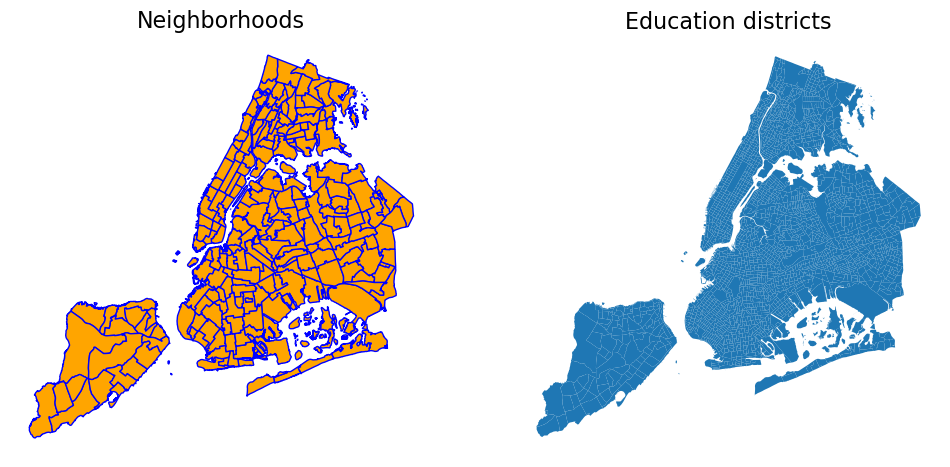

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
nyc_nei.plot(ax=ax1, color='orange', edgecolor='blue', linewidth=1) # here we are changing some defaults
nyc_edu.plot(ax=ax2)  # this one has the default plotting - look up what that is
ax1.set_title("Neighborhoods", fontsize=16)
ax2.set_title("Education districts", fontsize=16)
ax1.set_axis_off() # what happens if you set these to on or just comment out these lines?
ax2.set_axis_off()
plt.show()

### 3. Filter a dataframe based on a 'box' region that we specify


In [19]:
from shapely.geometry import box
# Create a custom polygon
polygon = box(-73.9, 40.55, -74.0, 40.75)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=nyc_nei.crs)

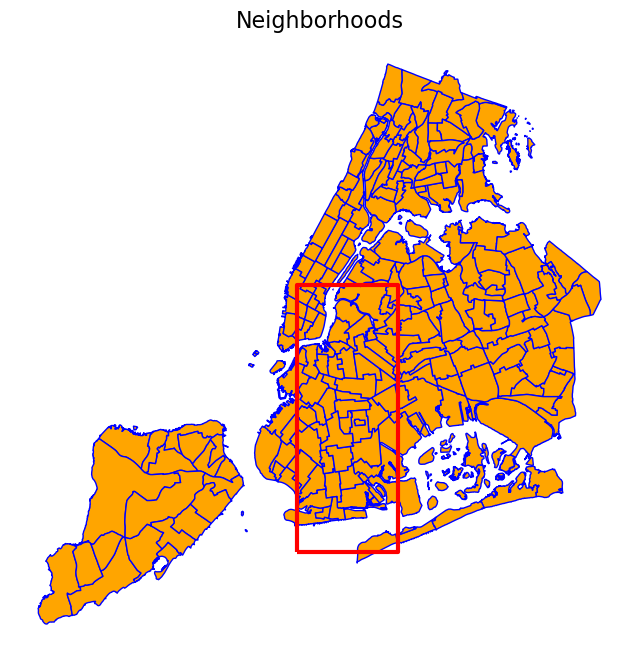

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
nyc_nei.plot(ax=ax1, color='orange', edgecolor='blue', linewidth=1) # here we are changing some defaults
poly_gdf.boundary.plot(ax=ax1, color="red", linewidth=3)
ax1.set_title("Neighborhoods", fontsize=16)
ax1.set_axis_off() # what happens if you set these to on or just comment out these lines?
plt.show()

### 4. Coordinate reference systems and transformations



Now a very important part of spatial data which we skipped over so far as the examples were already in the same coordinate systems is the 'crs' package which handles 'Coordinate Reference Systems'.

    > gpd.GeoDataFrame.crs
    > gpd.GeoDataFrame.set_crs
    > gpd.GeoDataFrame.to_crs

We will not describe these in full - we will instead describe how you check them and change them in python.  The Ordinance Survey has a nice intro to coordinate reference systems here: https://docs.os.uk/more-than-maps/geographic-data-visualisation/guide-to-cartography/coordinate-reference-systems (frankly the whole 'guide to cartography' from OS is pretty nice: https://docs.os.uk/more-than-maps/geographic-data-visualisation/guide-to-cartography).

So first let's investigate what crs our dataframes are already in. Let's start with nyc_nei.

We are going to do this with the command

    > nyc_nei.crs

This works because nyc_nei is a dataframe format made by the geopandas package, or known as a 'geopandas.GeoDataFrame', or if we have imported geopandas with an abrieviation for ease of typing as we did above (reminder we used 'import geopandas as gpd' in the first line), then also known as 'gpd.GeoDataFrame'.

So using

    > nyc_nei.crs

Is equivalent to using

    > gpd.GeoDataFrame.crs

For our specific dataframe.

Let's try this in a code block!

In [21]:
nyc_nei.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Exciting, we have learned that our CRS is 'WGS 84' and 2D projected as 'EPSG:4326'!

Now what on Earth is this!

For this we can go to our handy CRS resource: https://spatialreference.org/
Or perhaps the guidance on uk geospatial data standards coordinate reference systems: https://www.gov.uk/guidance/uk-geospatial-data-standards-coordinate-reference-systems
Or various intro's to GIS such as this one provided by QGIS: https://docs.qgis.org/3.34/en/docs/gentle_gis_introduction/coordinate_reference_systems.html
Or we could ask a language model to help point us in the right direction...

After all of this we learn that 'WGS 84' is the 'World Geodetic System 1984' and it provides a 3D coordinate system that many satellites use.

We can also learn a bunch of info about EPSG:4326 by searching for it in the spatialreference catalog above: https://spatialreference.org/ref/epsg/4326/

Let's check what the nyc_edu crs is and confirm our hypothesis that these are the same.

In [22]:
nyc_edu.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Oh no! They are not.

Indeed if we just plot them separately WITH their axes we probably could have guessed these are not on the same crs!

<Axes: >

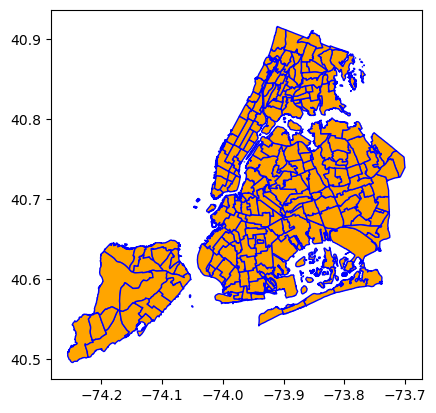

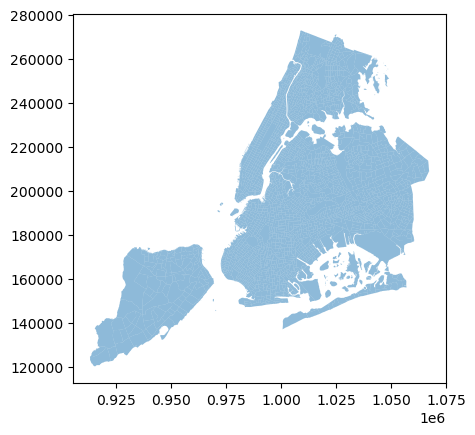

In [23]:
nyc_nei.plot(color='orange', edgecolor='blue', linewidth=1) # here we are changing some defaults
nyc_edu.plot(alpha=0.5)  # this one has the default plotting - look up what that is

So let's get them on the same crs!

For this we will use the 'to_crs' function and try to put the nyc_edu dataframe onto the nyc_nei crs which as a reminder was 'EPSG:4326'.

In [24]:
nyc_edu_new_crs = nyc_edu.to_crs("EPSG:4326")

Well that was simple!

Let's plot them again and see if this helped.

<Axes: >

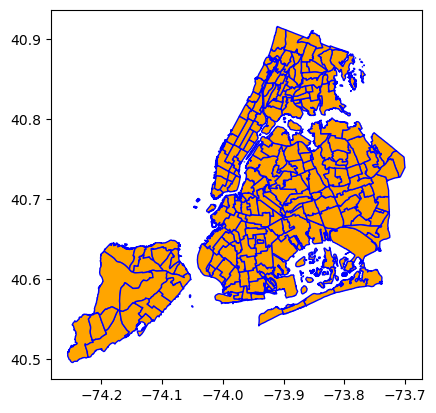

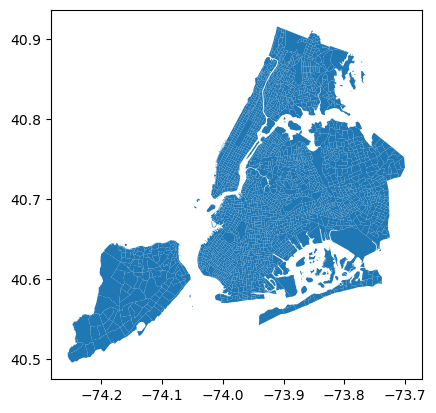

In [25]:
nyc_nei.plot(color='orange', edgecolor='blue', linewidth=1) # here we are changing some defaults
nyc_edu_new_crs.plot()

Woop! We are now in the same reference system.

To learn more about geopandas take a look at the user guide here: https://geopandas.org/en/stable/gallery/plot_clip.html



### 5. Join our dataframe with another and spatially filter that one too


So from now we will be using the dataframes

    > nyc_nei

and

    > nyc_edu_new_crs

as these are now in the same crs


From here let's use our spatial box filter that we made in Section 3 to actually filter our data sets. '.cx' is a coordinate based indexer that selects by intersection with the bounding box.

In [26]:
nyc_nei_filtered = nyc_nei.cx[polygon.bounds[0]:polygon.bounds[2], polygon.bounds[1]:polygon.bounds[3]]
nyc_edu_filtered = nyc_edu_new_crs.cx[polygon.bounds[0]:polygon.bounds[2], polygon.bounds[1]:polygon.bounds[3]]

# Show the dimensions of our two filtered dataframes
print("neighbourhood df shape = ", nyc_nei_filtered.shape, ", education df shape = ", nyc_edu_filtered.shape)

neighbourhood df shape =  (72, 99) , education df shape =  (773, 57)


In Geopandas, we can join two dataframes by spatial area using the command 'sjoin'.
The "how = 'inner'" option uses the columns from both dataframes but the geometry column only from the left dataframe.
The "predicate = 'intersects'" option selects any object where the boundary and interior intersect in any way with the other.

In [27]:
# Join the two dataframes with 'geometry' from the education dataframe.
nyc_edu_nei_joined = gpd.sjoin(nyc_edu_filtered, nyc_nei_filtered, how='inner', predicate='intersects')
nyc_edu_nei_joined

,POLY_ID,YOUTH_DROP,PER_MNRTY,HS_DROP,COL_DEGREE,PER_ASIAN,PER_WHITE,PER_BLACK,CTLabel,BoroCode,...,ntaname,boroname,popdty,ntacode,medianinco,medianagem,medianagef,medianage,HHsize,gini
0,1.0,0.000000,0.23,0.17,0.51,0.12,0.77,0.04,32,1,...,East Village,Manhattan,781548.2,MN22,518245,247.9,220.3,234.6,1.74857142857143,0.502271428571429
1,2.0,0.121951,0.32,0.16,0.53,0.11,0.68,0.05,34,1,...,Lower East Side,Manhattan,1326642.52,MN28,635184,577.3,635.7,605.5,2.38733333333333,0.524126666666667
1,2.0,0.121951,0.32,0.16,0.53,0.11,0.68,0.05,34,1,...,East Village,Manhattan,781548.2,MN22,518245,247.9,220.3,234.6,1.74857142857143,0.502271428571429
1,2.0,0.121951,0.32,0.16,0.53,0.11,0.68,0.05,34,1,...,Stuyvesant Town-Cooper Village,Manhattan,206727.51,MN50,196932,75.6,82.5,78,2.085,0.4677
2,3.0,0.000000,0.22,0.06,0.73,0.10,0.78,0.07,68,1,...,Gramercy,Manhattan,387816.6,MN21,390330,148.4,133.4,140.5,1.6475,0.485875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2208.0,0.064516,0.97,0.29,0.13,0.01,0.03,0.91,213,3,...,Crown Heights North,Brooklyn,1506628.84,BK61,980637,863.1,983.9,923.8,2.42925925925926,0.473666666666667
2207,2208.0,0.064516,0.97,0.29,0.13,0.01,0.03,0.91,213,3,...,Prospect Heights,Brooklyn,336479.12,BK64,493713,207.4,207.1,206.8,2.18833333333333,0.444
2208,2209.0,0.047859,0.99,0.30,0.12,0.00,0.01,0.94,325,3,...,Prospect Lefferts Gardens-Wingate,Brooklyn,1205452.098,BK60,726125,593.6,713.7,667.6,2.56555555555556,0.423022222222222
2208,2209.0,0.047859,0.99,0.30,0.12,0.00,0.01,0.94,325,3,...,Crown Heights South,Brooklyn,654216.19,BK63,358170,260.2,296.9,278,2.91444444444444,0.466544444444444


Let's plot our filtered dataframe to check it's correct. Notice that it isn't an exact rectangle, but includes all districts that intersect in any way with the bounding box. (Investiagte the 'clip' function in geopandas if you want to clip the data to exactly the red region)

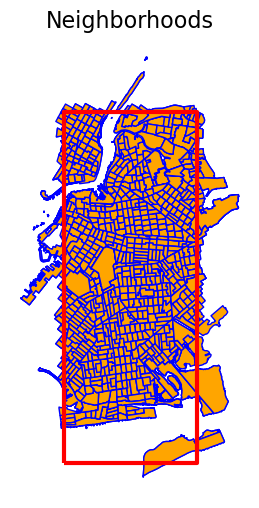

In [28]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
nyc_edu_nei_joined.plot(ax=ax1, color='orange', edgecolor='blue', linewidth=1)
poly_gdf.boundary.plot(ax=ax1, color="red", linewidth=3)
ax1.set_title("Neighborhoods", fontsize=16)
ax1.set_axis_off()
plt.show()

The blue edges in this plot are the education districts. The order in which you join the dataframes matters, as the geometry column is taken from the first one named in 'sjoin'. Let's swap the order.

In [29]:
# Join the two dataframes using 'geometry' from neighbourhoods.
nyc_nei_edu_joined = gpd.sjoin(nyc_nei_filtered, nyc_edu_filtered, how='inner', predicate='intersects')
nyc_nei_edu_joined

,UEMPRATE,cartodb_id,borocode,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,...,white,black,asian_right,sub18,GENDER_PAR,male_right,female_right,SCHOOL_CT,popdens,population
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,0.0,1.0,0.0,0.0,0.0000,1.0,0.0,2,0.609,1.0
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,1240.0,12.0,61.0,287.0,0.9459,664.0,702.0,0,15614.590,1366.0
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,1593.0,527.0,142.0,426.0,0.8897,1113.0,1251.0,0,30455.290,2364.0
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,1344.0,72.0,103.0,231.0,0.8537,712.0,834.0,0,26856.900,1546.0
0,0.095785,1,3,652,5067,277,6421,889,2225,48351,...,1142.0,23.0,32.0,278.0,1.0082,618.0,613.0,1,18384.070,1231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.054630,194,4,144,1944,272,6546,137,738,25088,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.000,0.0
193,0.054630,194,4,144,1944,272,6546,137,738,25088,...,2708.0,64.0,1353.0,1114.0,0.9985,2618.0,2622.0,0,23558.750,5240.0
193,0.054630,194,4,144,1944,272,6546,137,738,25088,...,3108.0,175.0,806.0,782.0,0.8663,2170.0,2505.0,0,44518.690,4675.0
193,0.054630,194,4,144,1944,272,6546,137,738,25088,...,557.0,25.0,682.0,296.0,1.0053,753.0,749.0,0,42766.890,1502.0


... and see how it looks.

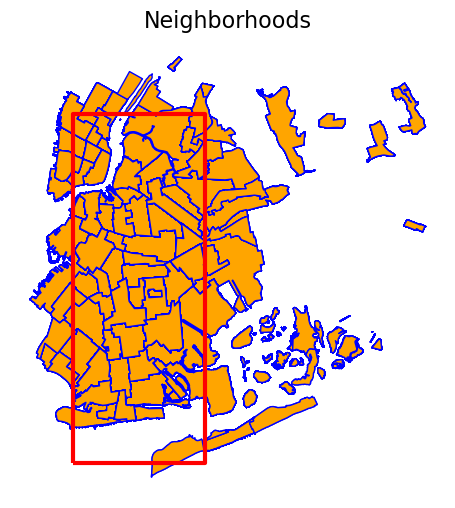

In [30]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
nyc_nei_edu_joined.plot(ax=ax1, color='orange', edgecolor='blue', linewidth=1)
poly_gdf.boundary.plot(ax=ax1, color="red", linewidth=3)
ax1.set_title("Neighborhoods", fontsize=16)
ax1.set_axis_off()
plt.show()

Now the borders are those of the neighbourhoods.

We can query our new dataframe. Here we print the number of neighbourhoods in each borough within the bounding box.

In [31]:
nyc_nei_edu_joined.boroname.value_counts()


boroname
Brooklyn     1264
Manhattan     177
Queens        133
Name: count, dtype: int64

Now that the two dataframes are joined, we can query educational data by neighbourhood. Below, we show the number of neighbourhoods in each borough where more than half of the population aged 25+ have a college degree.

In [32]:
nyc_nei_edu_joined[nyc_nei_edu_joined.COL_DEGREE > 0.5].boroname.value_counts()

boroname
Manhattan    113
Brooklyn      87
Queens         7
Name: count, dtype: int64

### 6. Plot the dataframes on top of each other

In this last bit we will simply make some interesting plots.

We can plot the neighbourhood outlines in black, and use colours for the education districts.

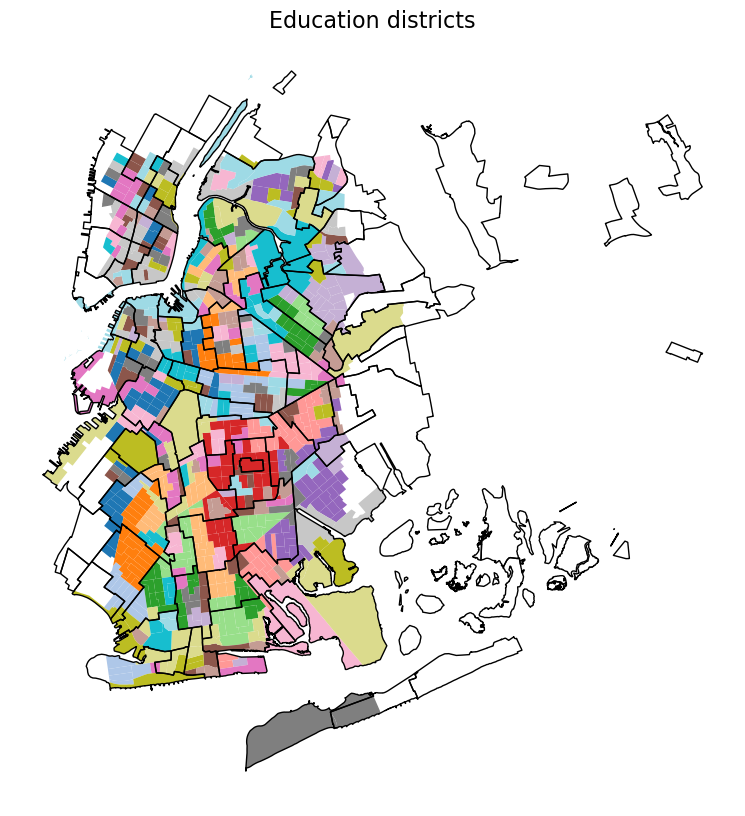

In [33]:
from matplotlib import colors
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
nyc_edu_filtered.plot(ax=ax1, cmap='tab20')
nyc_nei_filtered.plot(ax=ax1, color='None', edgecolor='black', linewidth=1)
ax1.set_title("Education districts", fontsize=16)
ax1.set_axis_off()
plt.show()


Let's plot a colormap showing the high school drop-out rates for population age 16-19, by education district.

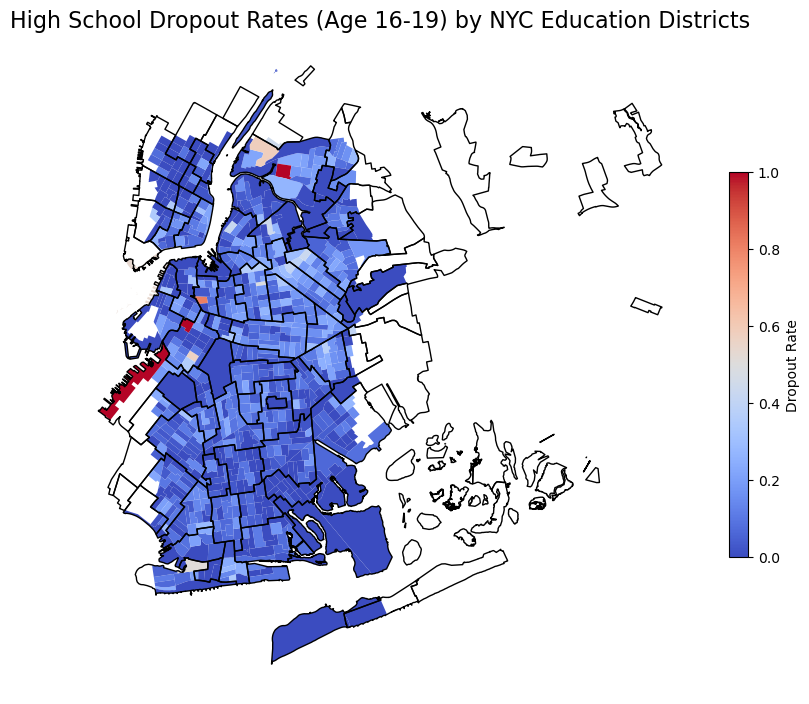

In [34]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
nyc_edu_filtered.plot(ax=ax1, column='YOUTH_DROP', cmap='coolwarm')
nyc_nei_filtered.plot(ax=ax1, color='None', edgecolor='black', linewidth=1)
ax1.set_title("High School Dropout Rates (Age 16-19) by NYC Education Districts", fontsize=16)
ax1.set_axis_off()

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=colors.Normalize(vmin=nyc_edu_filtered['YOUTH_DROP'].min(), vmax=nyc_edu_filtered['YOUTH_DROP'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax1, orientation='vertical', label='Dropout Rate', shrink=0.5)

plt.show()


By using joined dataframes, we can average the data by neighbourhood to get a broader picture.

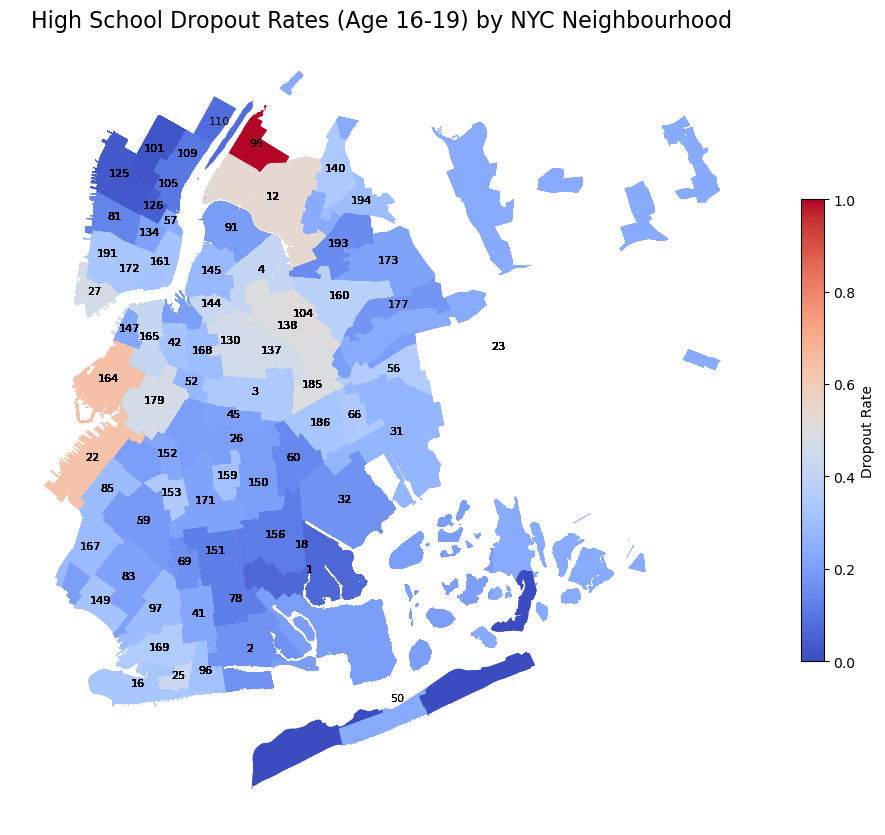

In [35]:
# Calculate the mean dropout rate by neighbourhood (cartodb_id)
avg_dropout = nyc_nei_edu_joined.groupby('cartodb_id')['YOUTH_DROP'].mean().reset_index()

# Use this to create a new dataframe using the 'merge' command
nyc_dropout = nyc_nei_edu_joined.merge(avg_dropout, on='cartodb_id', how='inner')

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Put the neighbourhood number in the centre of each neighbourhood
for idx, row in nyc_dropout.iterrows():
  centroid = row['geometry'].centroid
  ax1.text(centroid.x, centroid.y, str(row['cartodb_id']), ha='center', fontsize=8)

nyc_dropout.plot(ax=ax1, column='YOUTH_DROP_y', cmap='coolwarm')
ax1.set_title("High School Dropout Rates (Age 16-19) by NYC Neighbourhood", fontsize=16)
ax1.set_axis_off()

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=colors.Normalize(vmin=nyc_edu_filtered['YOUTH_DROP'].min(), vmax=nyc_edu_filtered['YOUTH_DROP'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax1, orientation='vertical', label='Dropout Rate', shrink=0.5)
plt.show()

# Sandbox

<div class="alert alert-block alert-success"> 
 <strong>Exercises</strong>
 <br>
 Play here with the code and see if you can manipulate the dataframes filtering them in different ways or changing their coordinate systems. 

</div>